# **1. Import Necessary Libraries**


1.   Pandas
2.   NumPy
3. Scikit Learn
4. SeaBorn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# **2. Load and Explore the Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('House_Rent_Dataset.csv')

Saving House_Rent_Dataset.csv to House_Rent_Dataset.csv


In [3]:
# Display the first few rows
print(df.head())

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

In [4]:
# Get basic statistics of numerical columns
print(df.describe())

               BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
std       0.832256  7.810641e+04   634.202328     0.884532
min       1.000000  1.200000e+03    10.000000     1.000000
25%       2.000000  1.000000e+04   550.000000     1.000000
50%       2.000000  1.600000e+04   850.000000     2.000000
75%       3.000000  3.300000e+04  1200.000000     2.000000
max       6.000000  3.500000e+06  8000.000000    10.000000


# **3. Data Preprocessing**

In [5]:
# Check for missing values
print(df.isnull().sum())

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


So, there is no missing data in the data set. So, we can go futhur to the next step.

# **4. Data Visualization**

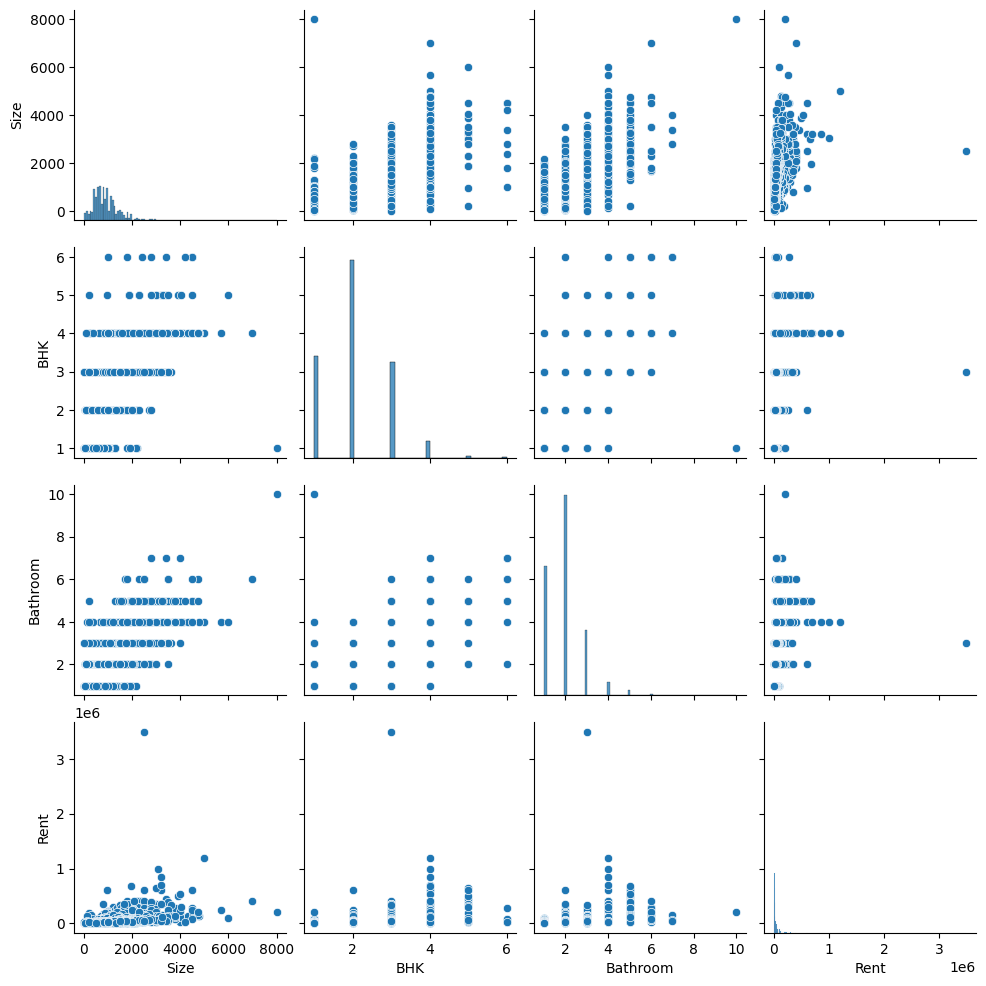

In [6]:
# Pair plot for all numerical features
numerical_features = ['Size', 'BHK', 'Bathroom', 'Rent']
sns.pairplot(df[numerical_features])
plt.show()

We are able to identify the the existence of outliers.

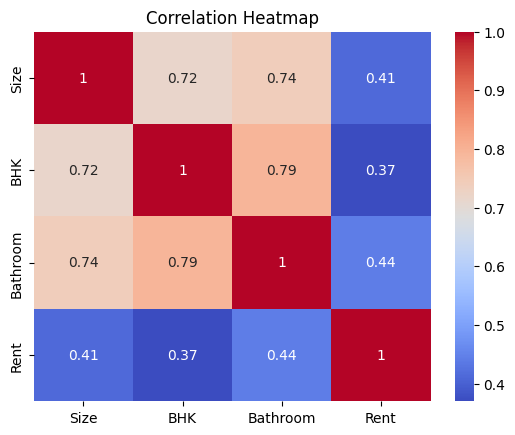

In [7]:
# Correlation heatmap for all numerical features
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **5. Split the Data into Training and Testing Sets**

In [8]:
X = df[['Size', 'BHK', 'Bathroom']]  # Features
y = df['Rent']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **6. Create and Train the Linear Regression Model**

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **7. Make Predictions**

In [10]:
# Testing data set is applied here to test the model
y_pred = model.predict(X_test)

# **8. Evaluate the Model**

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2554775777.0452137
R-squared: 0.35896327760744784


# **9. Visualize the Regression Line**

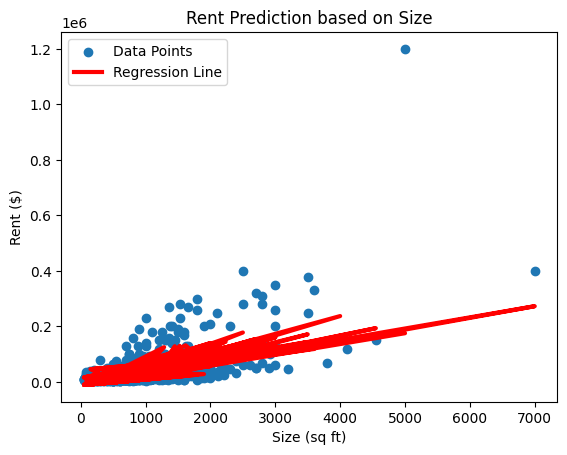

In [13]:
plt.scatter(X_test['Size'], y_test, label='Data Points')
plt.plot(X_test['Size'], y_pred, color='red', linewidth=3, label='Regression Line')
plt.xlabel('Size (sq ft)')
plt.ylabel('Rent ($)')
plt.title('Rent Prediction based on Size')
plt.legend()
plt.show()

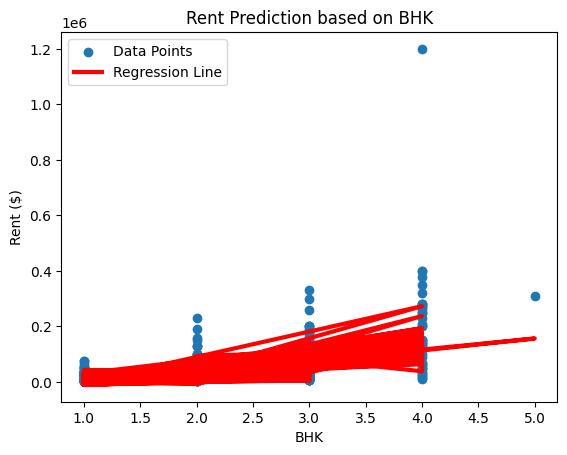

In [14]:
plt.scatter(X_test['BHK'], y_test, label='Data Points')
plt.plot(X_test['BHK'], y_pred, color='red', linewidth=3, label='Regression Line')
plt.xlabel('BHK')
plt.ylabel('Rent ($)')
plt.title('Rent Prediction based on BHK')
plt.legend()
plt.show()

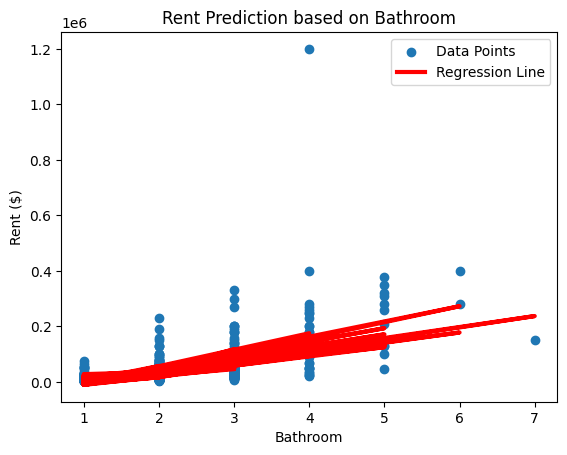

In [15]:
# Visualize 'Bathroom' vs. 'Rent'
plt.scatter(X_test['Bathroom'], y_test, label='Data Points')
plt.plot(X_test['Bathroom'], y_pred, color='red', linewidth=3, label='Regression Line')
plt.xlabel('Bathroom')
plt.ylabel('Rent ($)')
plt.title('Rent Prediction based on Bathroom')
plt.legend()
plt.show()

# **10. Make Predictions on New Data**

You can use the trained model to make predictions on new data by passing the new data to the `model.predict()` function.

In [16]:
# Input feature values for multiple properties
new_data_points = [
    [1000, 2, 1],
    [1100, 3, 2],
    [1200, 2, 2],
    [1300, 4, 2]
]

# Predict the rents for all properties in the list
predicted_rents = model.predict(new_data_points)

# Print the predictions for each property
for i, rent in enumerate(predicted_rents):
    print(f"Predicted Rent for Property {i+1}: ${rent:.2f}")

Predicted Rent for Property 1: $9117.31
Predicted Rent for Property 2: $38578.14
Predicted Rent for Property 3: $40952.66
Predicted Rent for Property 4: $42519.79


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
